In [4]:
using Plots, Zygote

# Linear Regression and Gradient Descent

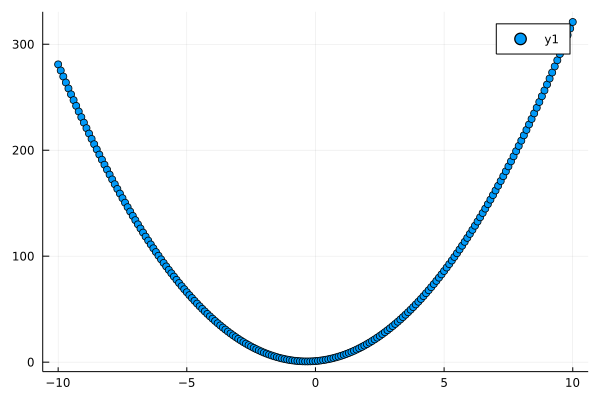

In [5]:
x=collect(-10:0.1:10);
y=map(x->3x^2+2*x+1, x);   #approximating 3x^2+2x+1
plot(x,y,seriestype =:scatter)


In [6]:
f(x,a,b,c)=a*x^2+b*x+c;

In [7]:
loss(y,t)=((t-y)^2)/2;

In [8]:
a=0;
b=0;
c=0;
a,b,c

(0, 0, 0)

In [9]:
a=rand();
b=rand();
c=rand();

α=1e-4;

while true
    costfun=0;
    grad_a=0;
    grad_b=0;
    grad_c=0;
    for i=1:length(x)
        t=f(x[i],a,b,c);
        costfun=costfun+loss(y[i],t);
        grad_a=grad_a-((x[i])^2)*(y[i]-t);
        grad_b=grad_b-(x[i])*(y[i]-t);
        grad_c=grad_c-(y[i]-t);
    end
    
    a=a-α*grad_a/(length(x));
    b=b-α*grad_b/(length(x));
    c=c-α*grad_c/(length(x));
    costfun=costfun/(length(x));
   # println("Cost :",costfun)
    if(costfun<0.01)
        break;
    end
end     

In [10]:
(a,b,c)  #using the values of a,b,c calculated using Gradient Descent

(3.001228455792785, 1.977253866307771, 0.925574248022067)

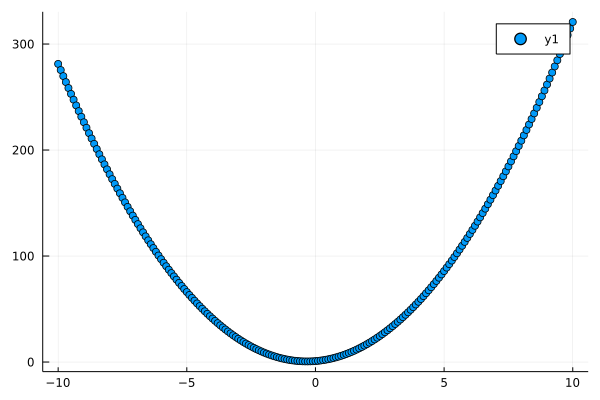

In [11]:
z=(map(x->f(x,a,b,c),x)); #Plotting the function approximated using gradient descent
plot(x,z, seriestype=:scatter)


The above code was to fit a 2 degree polynomial curve using handwritten derivatives.

In [12]:
gradient((x,a,b,c)->f(x,a,b,c),1,2,3,4)

(7, 1, 1, 1)

In [13]:
function forward(x,y,a,b,c)
    t=f(x,a,b,c);
    l=loss(y,t);
    return l
end

forward (generic function with 1 method)

In [14]:
a=rand();
b=rand();
c=rand();
α=1e-5;

while true
    costfun=0;
    grad_a=0;
    grad_b=0;
    grad_c=0;
    for i=1:length(x)
        costfun+=forward(x[i],y[i],a,b,c);
        gx,gy,ga,gb,gc=gradient((x,y,a,b,c)->forward(x,y,a,b,c),x[i],y[i],a,b,c);
        grad_a+=ga;
        grad_b+=gb;
        grad_c+=gc;
    end
    a-=α*(grad_a)/(length(x));
    b-=α*(grad_b)/(length(x));
    c-=α*(grad_c)/(length(x));
    costfun=costfun/(length(x));
    #println("Cost: ",costfun);
    if(costfun<1)
        break;
    end
end


In [15]:
(a,b,c)

(3.0104039860136425, 1.7673590256859124, 0.36967655883016903)

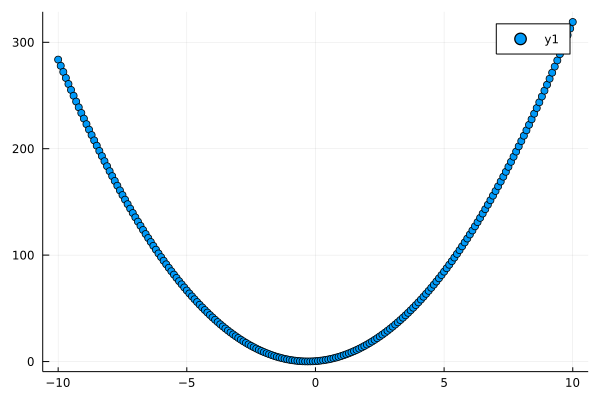

In [16]:
z=(map(x->f(x,a,b,c),x)); #Plotting the function approximated using gradient descent
plot(x,z, seriestype=:scatter)


Above is the code to fit a 2 degree polynomial curve using zygote.